<a href="https://colab.research.google.com/github/mariusel991/UPT/blob/main/BIA/Lab/lab5/EX1_EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [8]:
iris = load_iris()
X, y = iris.data, iris.target

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

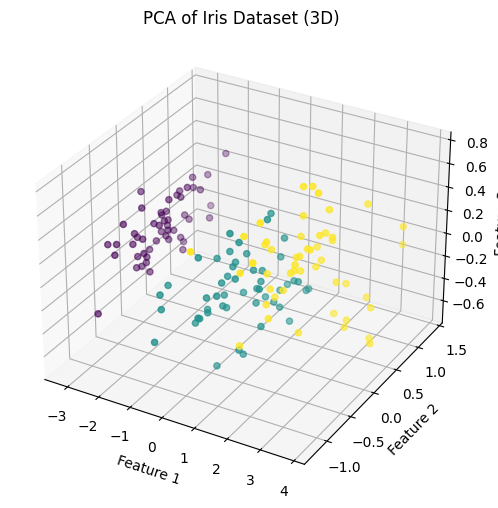

In [10]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, cmap='viridis')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('PCA of Iris Dataset (3D)')

plt.show()

In [11]:
print('Variance :',pca.explained_variance_ratio_)
X2D = pca.fit_transform(X)

Variance : [0.92461872 0.05306648 0.01710261]


In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

tsne = TSNE(n_components=3, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

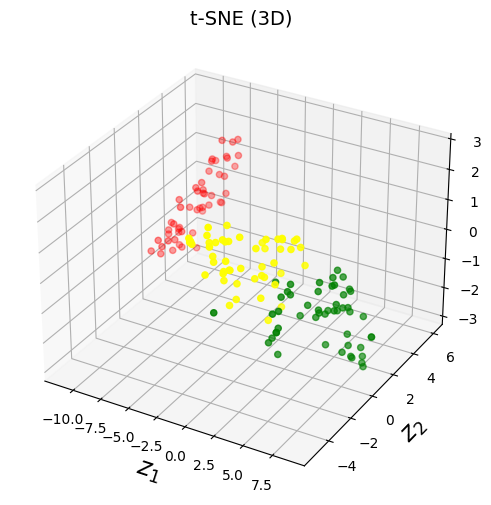

In [13]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d') # Create a 3D subplot

# Assuming 'y' contains the target variable/labels
cmap = ListedColormap(['Red','Yellow','Green'])
ax.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], X_reduced_tsne[:, 2], c=y, cmap=cmap)

ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18)
ax.set_zlabel("$z_3$", fontsize=18)
ax.set_title("t-SNE (3D)", fontsize=14)

plt.show()

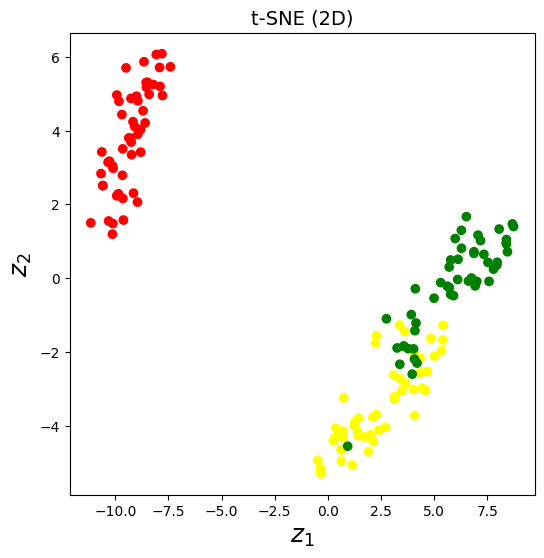

In [15]:
plt.figure(figsize=(6, 6))
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap=cmap)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.title("t-SNE (2D)", fontsize=14)
plt.show()

EX2



In [64]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
import time

In [65]:
digits = load_digits()
X, y = digits.data, digits.target

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [88]:
start_time = time.time()
svm_all_features = LinearSVC(C=5, random_state=42)
svm_all_features.fit(X_train, y_train)
end_time = time.time()
training_time_all_features = end_time - start_time

In [82]:
y_pred_all_features = svm_all_features.predict(X_test)
accuracy_all_features = accuracy_score(y_test, y_pred_all_features)

In [83]:
# Apply PCA to reduce features to 20
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [87]:
# Train Linear SVM with reduced features
start_time = time.time()
svm_reduced_features = LinearSVC(C=5, random_state=42)
svm_reduced_features.fit(X_train_pca, y_train)
end_time = time.time()
training_time_reduced_features = end_time - start_time

In [85]:
y_pred_reduced_features = svm_reduced_features.predict(X_test_pca)
accuracy_reduced_features = accuracy_score(y_test, y_pred_reduced_features)

In [90]:
print("Training time with all features:", training_time_all_features)
print("Training time with reduced features:", training_time_reduced_features)
print("Accuracy with all features:", accuracy_all_features*100, '%')
print("Accuracy with reduced features:", accuracy_reduced_features*100, '%')

Training time with all features: 0.44409990310668945
Training time with reduced features: 0.21179556846618652
Accuracy with all features: 95.77777777777777 %
Accuracy with reduced features: 95.33333333333334 %
